#TP note



In [26]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization

from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import load_model

import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

print(tf.__version__)

2.11.0


###Load the dataset

In [27]:
#loading dataset (Cifar-10)
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [28]:
#split the dataste into train and test
import numpy as np
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#SqueezNet (1er modèle)

In [29]:
#define network (normalisation)
model = keras.Sequential([
  keras.layers.Conv2D(96, kernel_size=7, strides=2, activation='relu', padding='same', input_shape=(32, 32, 3)),
  keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2),
  keras.layers.BatchNormalization(),
  keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'),
  keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2),
  keras.layers.BatchNormalization(),
  keras.layers.Conv2D(256, kernel_size=3, activation='relu', padding='same'),
  keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2),
  keras.layers.BatchNormalization(),
  keras.layers.Flatten(),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(10, activation='softmax')
])


In [30]:
#display the architecture of the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 16, 16, 96)        14208     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 7, 7, 96)         0         
 g2D)                                                            
                                                                 
 batch_normalization_18 (Bat  (None, 7, 7, 96)         384       
 chNormalization)                                                
                                                                 
 conv2d_16 (Conv2D)          (None, 7, 7, 128)         110720    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 3, 3, 128)        0         
 g2D)                                                            
                                                      

In [31]:
#creation of callbacks
es = EarlyStopping(monitor='val_accuracy', mode='auto', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

#compilation of the model with "Adam" as an optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
#train of the model
history = model.fit(x_train, y_train, validation_split=0.2, epochs=30000, batch_size=200, verbose=0, callbacks=[es, mc])

#save of th best model
saved_model = load_model('best_model.h5')


Epoch 1: val_accuracy improved from -inf to 0.12810, saving model to best_model.h5

Epoch 2: val_accuracy improved from 0.12810 to 0.35390, saving model to best_model.h5

Epoch 3: val_accuracy improved from 0.35390 to 0.55910, saving model to best_model.h5

Epoch 4: val_accuracy improved from 0.55910 to 0.57230, saving model to best_model.h5

Epoch 5: val_accuracy did not improve from 0.57230

Epoch 6: val_accuracy improved from 0.57230 to 0.69320, saving model to best_model.h5

Epoch 7: val_accuracy did not improve from 0.69320

Epoch 8: val_accuracy improved from 0.69320 to 0.70140, saving model to best_model.h5

Epoch 9: val_accuracy did not improve from 0.70140

Epoch 10: val_accuracy did not improve from 0.70140

Epoch 11: val_accuracy improved from 0.70140 to 0.70630, saving model to best_model.h5

Epoch 12: val_accuracy did not improve from 0.70630

Epoch 13: val_accuracy did not improve from 0.70630

Epoch 14: val_accuracy did not improve from 0.70630

Epoch 15: val_accuracy d

In [33]:
#I normalised the model only to optimise it with "SGD"
model = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=2),
    Dropout(0.2),
    Conv2D(64, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_uniform'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=2),
    Dropout(0.2),
    Conv2D(64, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_uniform'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=2),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu', kernel_initializer='he_uniform'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [34]:
#same as for "Adam" but for "SGD"
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.8, nesterov=False)
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_split=0.2, epochs=3000, batch_size=200, verbose=0, callbacks=[es, mc])
saved_model = load_model('best_model.h5')


Epoch 1: val_accuracy did not improve from 0.72780

Epoch 2: val_accuracy did not improve from 0.72780

Epoch 3: val_accuracy did not improve from 0.72780

Epoch 4: val_accuracy did not improve from 0.72780

Epoch 5: val_accuracy did not improve from 0.72780

Epoch 6: val_accuracy did not improve from 0.72780

Epoch 7: val_accuracy did not improve from 0.72780

Epoch 8: val_accuracy did not improve from 0.72780

Epoch 9: val_accuracy did not improve from 0.72780

Epoch 10: val_accuracy did not improve from 0.72780

Epoch 11: val_accuracy did not improve from 0.72780

Epoch 12: val_accuracy did not improve from 0.72780

Epoch 13: val_accuracy did not improve from 0.72780

Epoch 14: val_accuracy did not improve from 0.72780

Epoch 15: val_accuracy did not improve from 0.72780

Epoch 16: val_accuracy did not improve from 0.72780

Epoch 17: val_accuracy did not improve from 0.72780

Epoch 18: val_accuracy did not improve from 0.72780

Epoch 19: val_accuracy did not improve from 0.72780

E

With the SqueezNet model, we have an accuracy of 0.77970 optimized with "SGD".

##Model

In [35]:
model = load_model('best_model.h5')

In [36]:
# Test accuracy and loss
_, train_acc = saved_model.evaluate(x_train, y_train, verbose=0)
_, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
print('Train: %.4f, Test: %.4f' % (train_acc, test_acc))

Train: 0.8614, Test: 0.7696


##Plot

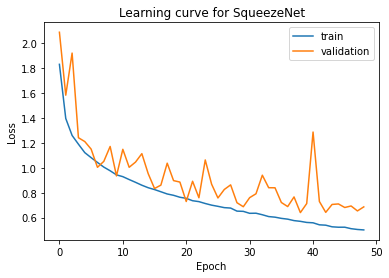

In [37]:
# Plot on the loss on the training and validation set
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Learning curve for SqueezeNet')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


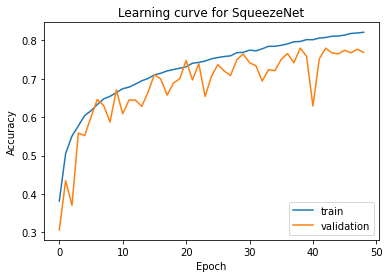

In [38]:
# Plot accuracy on the training and validation set
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Learning curve for SqueezeNet')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

313/313 [==============================] - 1s 2ms/step


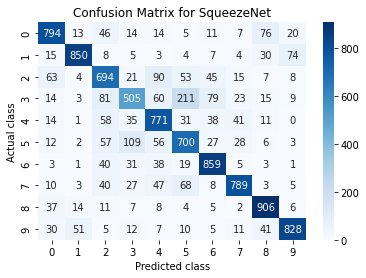

In [39]:
# Prediction on the test set
y_pred = np.argmax(saved_model.predict(x_test), axis=-1)

# Computation of the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Creating the visualization with seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted class')
plt.ylabel('Actual class')
plt.title('Confusion Matrix for SqueezeNet')
plt.show()

In [40]:
predictions = saved_model.predict(x_test)
predictions[3]

print(np.argmax(predictions[3]))#predection
print(y_test[3])#true label
#recall cifar labels: airplane:0, automobile:1, bird:2, cat:3, deer:4, dog:5, frog:6, horse:7, ship:8, truck:9

313/313 [==============================] - 1s 2ms/step
0
[0]


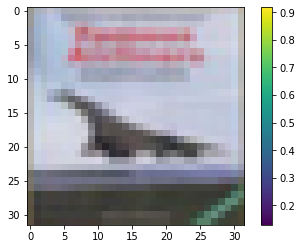

In [41]:
plt.figure()
plt.imshow(x_test[3])
plt.colorbar()
plt.grid(False)
plt.show()

#Inception (2nd modèle)

In [42]:
#define network (normalisation for "Adam")
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_uniform'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_uniform'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])


In [43]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_25 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_26 (Bat  (None, 16, 16, 64)      

In [44]:
# Same as befor (with SqueezNet)
es = keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10, restore_best_weights=True)
mc = keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

In [45]:
# Train the network with 20% validation
history = model.fit(x_train, y_train, validation_split=0.2, epochs=3000, batch_size=200, verbose=0, callbacks=[es, mc])
saved_model = load_model('best_model.h5')


Epoch 1: val_accuracy improved from -inf to 0.16830, saving model to best_model.h5

Epoch 2: val_accuracy improved from 0.16830 to 0.46970, saving model to best_model.h5

Epoch 3: val_accuracy improved from 0.46970 to 0.63000, saving model to best_model.h5

Epoch 4: val_accuracy improved from 0.63000 to 0.66550, saving model to best_model.h5

Epoch 5: val_accuracy improved from 0.66550 to 0.68140, saving model to best_model.h5

Epoch 6: val_accuracy improved from 0.68140 to 0.70450, saving model to best_model.h5

Epoch 7: val_accuracy improved from 0.70450 to 0.72720, saving model to best_model.h5

Epoch 8: val_accuracy did not improve from 0.72720

Epoch 9: val_accuracy improved from 0.72720 to 0.74260, saving model to best_model.h5

Epoch 10: val_accuracy did not improve from 0.74260

Epoch 11: val_accuracy improved from 0.74260 to 0.74880, saving model to best_model.h5

Epoch 12: val_accuracy improved from 0.74880 to 0.77720, saving model to best_model.h5

Epoch 13: val_accuracy di

In [46]:
# Normalisation of the network (for "SGD" for better accuracy)
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, kernel_size=3, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, kernel_size=3, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    keras.layers.Dropout(0.4),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [47]:
# Test with "SGD"
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.8, nesterov=False)
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_split=0.2, epochs=3000, batch_size=200, verbose=0, callbacks=[es, mc])
saved_model = load_model('best_model.h5')


Epoch 1: val_accuracy did not improve from 0.79740

Epoch 2: val_accuracy did not improve from 0.79740

Epoch 3: val_accuracy did not improve from 0.79740

Epoch 4: val_accuracy did not improve from 0.79740

Epoch 5: val_accuracy did not improve from 0.79740

Epoch 6: val_accuracy did not improve from 0.79740

Epoch 7: val_accuracy did not improve from 0.79740

Epoch 8: val_accuracy did not improve from 0.79740

Epoch 9: val_accuracy did not improve from 0.79740

Epoch 10: val_accuracy did not improve from 0.79740

Epoch 11: val_accuracy did not improve from 0.79740

Epoch 12: val_accuracy did not improve from 0.79740

Epoch 13: val_accuracy did not improve from 0.79740

Epoch 14: val_accuracy did not improve from 0.79740

Epoch 15: val_accuracy did not improve from 0.79740

Epoch 16: val_accuracy did not improve from 0.79740

Epoch 17: val_accuracy did not improve from 0.79740

Epoch 18: val_accuracy did not improve from 0.79740

Epoch 19: val_accuracy did not improve from 0.79740

E

With the SqueezNet model, we have an accuracy of 0.84790 optimized with "SGD".

##Model

In [48]:
model = load_model('best_model.h5')

In [49]:
# Test accuracy and loss
_, train_acc = saved_model.evaluate(x_train, y_train, verbose=0)
_, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
print('Train: %.4f, Test: %.4f' % (train_acc, test_acc))

Train: 0.9538, Test: 0.8432


##Plot

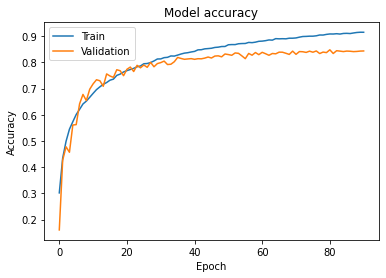

In [50]:
# Plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

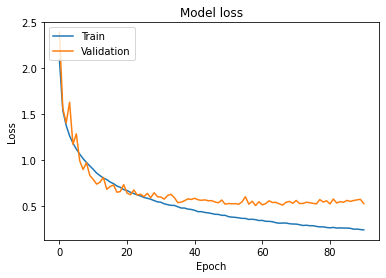

In [51]:
# Plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

313/313 [==============================] - 1s 3ms/step


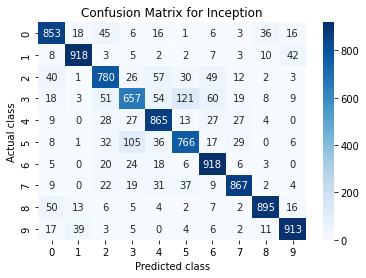

In [52]:
# Make predictions on the test set with the Inception model
y_pred = np.argmax(model.predict(x_test), axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Creating the visualization with seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted class')
plt.ylabel('Actual class')
plt.title('Confusion Matrix for Inception')
plt.show()

In [53]:
predictions = saved_model.predict(x_test)
predictions[7]

print(np.argmax(predictions[7]))#predection
print(y_test[7])#true label
#recall cifar labels: airplane:0, automobile:1, bird:2, cat:3, deer:4, dog:5, frog:6, horse:7, ship:8, truck:9

313/313 [==============================] - 1s 3ms/step
6
[6]


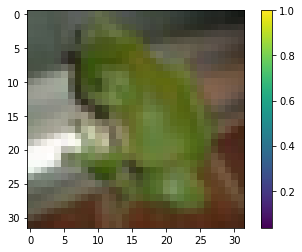

In [54]:
plt.figure()
plt.imshow(x_test[7])
plt.colorbar()
plt.grid(False)
plt.show()